Mean Squared Error: 107.66
R-squared: 0.94


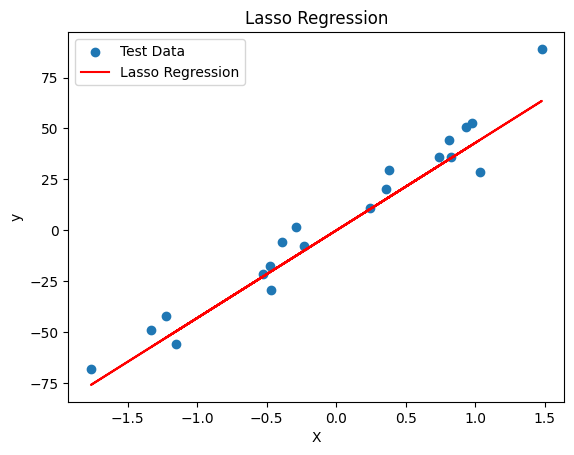

Lasso Coefficients: [43.02138252]


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha hyperparameter for the level of regularization

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the data and the regression line
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pred, color="red", label="Lasso Regression")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Lasso Regression")
plt.show()

# Print the coefficients of the model
print("Lasso Coefficients:", lasso_model.coef_)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso

In [ ]:
df=pd.read_csv('/content/melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
cols_to_use=['Suburb','Rooms','Type','Price','Method','SellerG',\
        'Regionname','Propertycount','Distance','CouncilArea',\
        'Bedroom2','Bathroom','Car','Landsize','BuildingArea']
df1=df[cols_to_use]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  object 
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Regionname     13580 non-null  object 
 7   Propertycount  13580 non-null  float64
 8   Distance       13580 non-null  float64
 9   CouncilArea    12211 non-null  object 
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.6+ MB


In [ ]:
df1.dropna(subset=['Price','Propertycount','Regionname',\
                  'Distance','CouncilArea'],axis=0,inplace=True)
df1=df1.reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12211 non-null  object 
 1   Rooms          12211 non-null  int64  
 2   Type           12211 non-null  object 
 3   Price          12211 non-null  float64
 4   Method         12211 non-null  object 
 5   SellerG        12211 non-null  object 
 6   Regionname     12211 non-null  object 
 7   Propertycount  12211 non-null  float64
 8   Distance       12211 non-null  float64
 9   CouncilArea    12211 non-null  object 
 10  Bedroom2       12211 non-null  float64
 11  Bathroom       12211 non-null  float64
 12  Car            12211 non-null  float64
 13  Landsize       12211 non-null  float64
 14  BuildingArea   6446 non-null   float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.4+ MB


<ipython-input-5-88c37da76fe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['Price','Propertycount','Regionname',\


In [ ]:
df1

,Suburb,Rooms,Type,Price,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,Abbotsford,2,h,1480000.0,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,2.0,1.0,1.0,202.0,NaN
1,Abbotsford,2,h,1035000.0,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,2.0,1.0,0.0,156.0,79.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,3.0,2.0,0.0,134.0,150.0
3,Abbotsford,3,h,850000.0,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,3.0,2.0,1.0,94.0,NaN
4,Abbotsford,4,h,1600000.0,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra,3.0,1.0,2.0,120.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12206,Williamstown,3,h,1285000.0,S,Jas,Western Metropolitan,6380.0,6.8,Hobsons Bay,3.0,1.0,0.0,296.0,NaN
12207,Windsor,2,u,560000.0,PI,hockingstuart,Southern Metropolitan,4380.0,4.6,Stonnington,2.0,1.0,1.0,0.0,61.6
12208,Wollert,3,h,525300.0,S,Stockdale,Northern Metropolitan,2940.0,25.5,Whittlesea,3.0,2.0,2.0,400.0,NaN
12209,Yarraville,2,h,750000.0,SP,hockingstuart,Western Metropolitan,6543.0,6.3,Maribyrnong,2.0,1.0,2.0,269.0,NaN


In [ ]:
df1['Bedroom2'].fillna(df1['Bedroom2'].median(),inplace=True)
df1['Bathroom'].fillna(df1['Bathroom'].median(),inplace=True)
df1['Car'].fillna(0,inplace=True)
df1['Landsize'].fillna(df1['Landsize'].mean(),inplace=True)
df1['BuildingArea'].fillna(df1['BuildingArea'].mean(),inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12211 non-null  object 
 1   Rooms          12211 non-null  int64  
 2   Type           12211 non-null  object 
 3   Price          12211 non-null  float64
 4   Method         12211 non-null  object 
 5   SellerG        12211 non-null  object 
 6   Regionname     12211 non-null  object 
 7   Propertycount  12211 non-null  float64
 8   Distance       12211 non-null  float64
 9   CouncilArea    12211 non-null  object 
 10  Bedroom2       12211 non-null  float64
 11  Bathroom       12211 non-null  float64
 12  Car            12211 non-null  float64
 13  Landsize       12211 non-null  float64
 14  BuildingArea   12211 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
ohe=OneHotEncoder(drop='first')
columns_to_encode=['Suburb','Type','Method','SellerG','Regionname',\
                  'CouncilArea']
suburb=ohe.fit_transform(df1[columns_to_encode])
df1_suburb=pd.DataFrame(suburb.toarray(),\
          columns=ohe.get_feature_names_out())
df1_suburb

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2=pd.concat([df1,df1_suburb],axis=1)
df3=df2.drop(columns_to_encode,axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Columns: 613 entries, Rooms to CouncilArea_Yarra Ranges
dtypes: float64(612), int64(1)
memory usage: 57.1 MB


In [ ]:
model=LinearRegression()
X=df3.drop(['Price'],axis=1)
y=df3['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

-171308292410.8767

In [ ]:
model.score(X_train,y_train)

0.7041410824429284

In [ ]:
model_lasso=Lasso()
model_lasso.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.610e+14, tolerance: 4.461e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:

model

LinearRegression()